In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()

In [3]:
df = pd.read_table('SMSSpamCollection', header = None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df[0].value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [5]:
df.rename(columns = {0: 'label',
                    1: 'text'}, inplace=True)

In [6]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
classes = df['label']
print(classes.value_counts())

ham     4825
spam     747
Name: label, dtype: int64


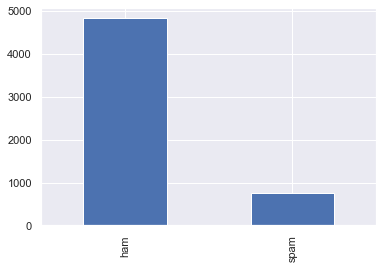

In [8]:
classes.value_counts().plot(kind='bar')
plt.show()

# EDA

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['spam'] = encoder.fit_transform(df['label'])
df.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
import nltk

In [31]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#df['text'][0]

In [34]:
lem = WordNetLemmatizer()

def remove_punc_and_stopwords(text):
    punc_rem = [ch.lower() for ch in text if ch not in string.punctuation]
    punc_rem = ''.join(punc_rem).split() #will get individual words for each text
    
    stop_rem = [lem.lemmatize(word) for word in punc_rem if word not in set(stopwords.words('english'))]
    
    return stop_rem

#remove_punc_and_stopwords(df['text'][0:2])
df['text'].apply(remove_punc_and_stopwords).head(1)

0    [go, jurong, point, crazy, available, bugis, n...
Name: text, dtype: object

In [35]:
df.head()

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [51]:
df_ham = df[df['spam'] == 0]
df_spam = df[df['spam'] == 1]

In [52]:
df_ham['text'] = df_ham['text'].apply(remove_punc_and_stopwords)
df_spam['text'] = df_spam['text'].apply(remove_punc_and_stopwords)

In [53]:
df_ham.head()

,label,text,spam
0,ham,"[go, jurong, point, crazy, available, bugis, n...",0
1,ham,"[ok, lar, joking, wif, u, oni]",0
3,ham,"[u, dun, say, early, hor, u, c, already, say]",0
4,ham,"[nah, dont, think, go, usf, life, around, though]",0
6,ham,"[even, brother, like, speak, treat, like, aid,...",0


In [58]:
words_ham = df_ham['text'].to_list()
words_spam = df_spam['text'].to_list()

In [63]:
words_ham[:2]
#type(words_ham)

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni']]

In [65]:
list_ham_words = []

for sublist in words_ham:
    for item in sublist:
        list_ham_words.append(item)
        
list_ham_words[:10]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

In [66]:
list_spam_words = []

for sublist in words_spam:
    for item in sublist:
        list_spam_words.append(item)
        
list_spam_words[:10]

['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts']

In [67]:
f_ham = nltk.FreqDist(list_ham_words)
f_spam = nltk.FreqDist(list_spam_words)
#print(type(df_ham['text']))

In [71]:
f_ham.most_common(2)

[('u', 1040), ('im', 451)]

In [72]:
df_top_30_ham_words = pd.DataFrame(f_ham.most_common(30), columns={'word', 'count'})
df_top_30_spam_words = pd.DataFrame(f_spam.most_common(30), columns={'word', 'count'})

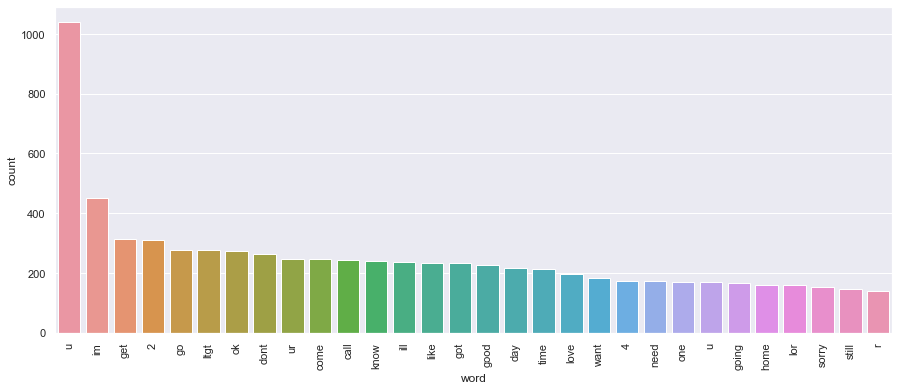

In [78]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'word',
           y = 'count',
           data = df_top_30_ham_words)
plt.xticks(rotation = 'vertical')
plt.show()

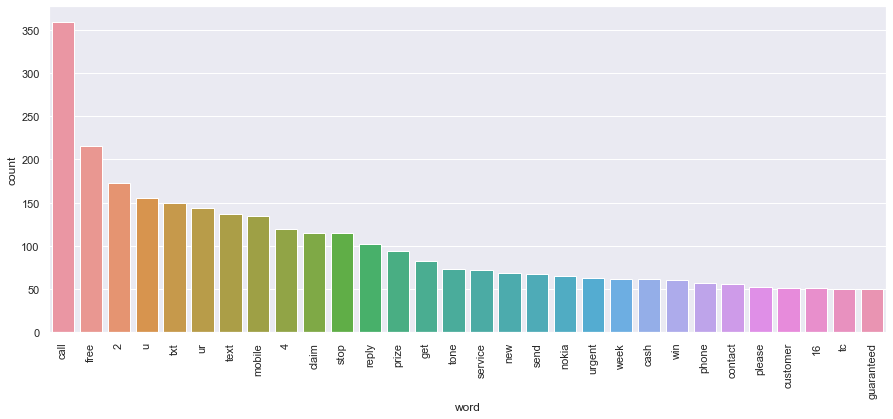

In [79]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'word',
           y = 'count',
           data = df_top_30_spam_words)
plt.xticks(rotation = 'vertical')
plt.show()

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
8
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=remove_punc_and_stopwords)
tfidf_data = vectorizer.fit_transform(df['text'])

In [86]:
type(tfidf_data)

scipy.sparse.csr.csr_matrix

In [87]:
tfidf_data.shape

(5572, 9001)

# train-test split

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_data, df['spam'], random_state = 2, test_size = 0.25)

In [90]:
print(X_train.shape)
print(X_test.shape)

(4179, 9001)
(1393, 9001)


In [91]:
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score

# Naive Bayes

In [92]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()
mnb_model = mnb_classifier.fit(X_train, y_train)
mnb_ypred = mnb_model.predict(X_test)
mnb_acc = accuracy_score(y_test, mnb_ypred)
mnb_acc

0.9562096195262024

# Try Naive Bayes after Scaling with MaxAbsScaler()

# KNN with GridSearchCV

# Classification Pipelines

In [97]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df['text'], df['spam'], random_state = 2, test_size = 0.25)

In [98]:
from sklearn.feature_extraction.text import TfidfTransformer

In [99]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer(analyzer = remove_punc_and_stopwords)),
                ('tfidf', TfidfTransformer()),
                ('mnb_clf', MultinomialNB())])

In [100]:
pipe.fit(X_train_p, y_train_p)
pipe_ypred = pipe.predict(X_test_p)
pipe_acc = accuracy_score(y_test_p, pipe_ypred)
print(pipe_acc)

0.9576453697056713


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('tfidf', TfidfVectorizer(analyzer = remove_punc_and_stopwords)),
                ('knn_clf', KNeighborsClassifier())])

param_grid = {'knn_clf__n_neighbors' : [5, 8, 10, 15]}

model = GridSearchCV(pipe, param_grid=param_grid, cv = 5, n_jobs=-1)
model.fit(X_train_p, y_train_p)

model_ypred = model.predict(X_test_p)
model_acc = accuracy_score(y_test_p, model_ypred)
model_acc

0.9332376166547021

In [102]:
print(model.best_params_)
print(model.best_score_)

{'knn_clf__n_neighbors': 15}
0.9418521177315147
